In [1]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("..")

In [4]:
import cv2
import numpy as np
from glob import glob
from models import Yolov4

In [5]:
model = Yolov4(class_name_path='../class_names/butelka_classes.txt')

Yolov4
(416, 416, 3)
Build model


2021-11-30 15:16:18.437864: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-30 15:16:18.450112: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-30 15:16:18.451013: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-30 15:16:18.479424: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-30 15:16:18.480494: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read f

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 416, 416, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 416, 416, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 416, 416, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

nms iou: 0.413 score: 0.3


In [6]:
model.load_model('wagi')

nms iou: 0.413 score: 0.3


img shape:  (4032, 3024, 3)
# of bboxes: 1


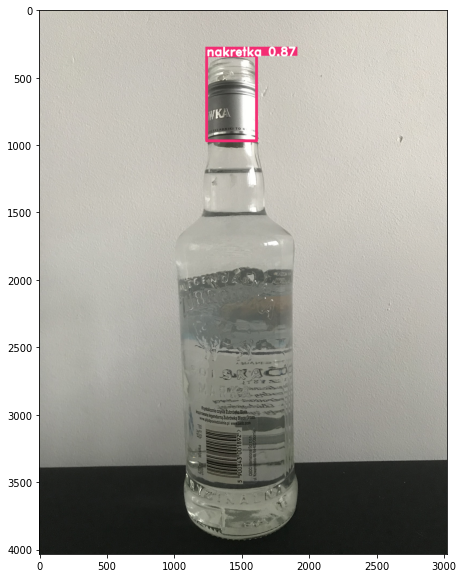

img shape:  (4032, 3024, 3)
# of bboxes: 1


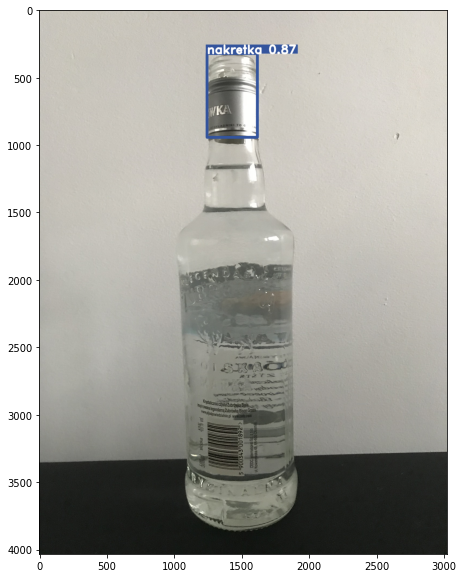

,x1,y1,x2,y2,class_name,score,w,h
0,1245,322,1618,943,nakretka,0.872347,373,621


In [13]:
model.predict('../dataset/valid_images/IMG_6026.JPG', random_color=True)
model.predict('../dataset/valid_images/IMG_6027.JPG', random_color=True)
#model.predict('../dataset/valid_images/IMG20211101141134_01.jpg', random_color=True)
#model.predict('../dataset/valid_images/IMG20211101141134_00.jpg', random_color=True)
#model.predict('../dataset/valid_images/IMG20211101141134_02.jpg', random_color=True)
#model.predict('../dataset/valid_images/IMG20211101141134_03.jpg', random_color=True)
#model.predict('../dataset/valid_images/IMG_8034.JPG', random_color=True)

img shape:  (3840, 2160, 3)
# of bboxes: 1


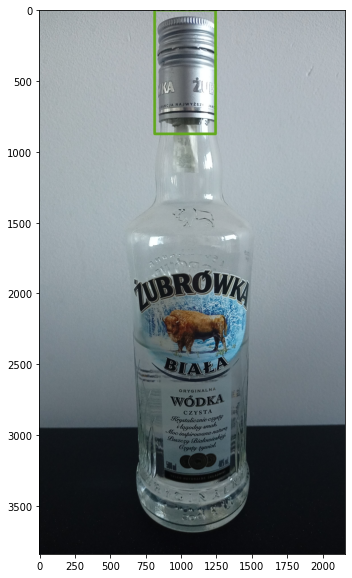

In [8]:
img_path = '../dataset/valid_images/IMG20211101140317_00.jpg'
img_width, img_height = 312, 416
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)[:, :, ::-1]
img = cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_AREA)
detections = model.predict(img_path, random_color = True)

In [9]:
orig_img = cv2.imread(img_path)

In [10]:
def crop_roi():
    cropped_imgs = []
    for detection in detections.values:
        cropped_img = orig_img[detection[1]:detection[3], detection[0]:detection[2]]
        cropped_imgs.append(cropped_img)
    return cropped_imgs

cropped_imgs = crop_roi()

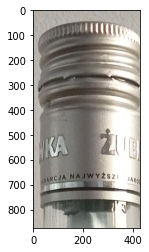

In [11]:
import matplotlib.pyplot as plt
plt.imshow(cropped_img)